<a href="https://colab.research.google.com/github/fspanda/ALBERT-TF2.0/blob/master/Code/Fantasy_League_LSTM_player_minute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vaastav/Fantasy-Premier-League.git

Cloning into 'Fantasy-Premier-League'...
remote: Enumerating objects: 5982, done.
remote: Counting objects: 100% (5982/5982), done.
remote: Compressing objects: 100% (3150/3150), done.
remote: Total 119401 (delta 2456), reused 5289 (delta 2329), pack-reused 113419
Receiving objects: 100% (119401/119401), 39.61 MiB | 23.88 MiB/s, done.
Resolving deltas: 100% (55602/55602), done.


In [2]:
import os

file_list = os.listdir('/content/Fantasy-Premier-League/data/2019-20/players')
file_list

['Victor_Wanyama_348',
 'Christian_Atsu_267',
 'Maarten_Stekelenburg_149',
 'Nabil_Bentaleb_612',
 'Mason_Mount_463',
 'Dejan_Lovren_186',
 'Granit_Xhaka_18',
 'Alex_McCarthy_318',
 'Alexandre_Jankewitz_649',
 'Reiss_Nelson_489',
 'Oumar_Niasse_570',
 'Emiliano_Martínez_427',
 'Mamadou_Sakho_125',
 'Mason_Greenwood_234',
 'Antonio_Rüdiger_104',
 'Javier_Manquillo_256',
 'Maya_Yoshida_310',
 'Harry_Wilson_505',
 'Danny_Rose_332',
 'Adama_Traoré_417',
 'Carlos_Sánchez_397',
 'Mario_Lemina_324',
 'Matt_Targett_309',
 'Daniel_Amartey_178',
 'Billy_Sharp_298',
 'Fabio Henrique_Tavares_197',
 'Tim_Krul_280',
 'Lucas_Torreira_19',
 'Daniel_Adshead_669',
 'Jordan_Ayew_468',
 'Chris_Smalling_223',
 'Wilfried_Zaha_133',
 'Rúben Gonçalo_Silva Nascimento Vinagre_406',
 'Max_Thompson_640',
 'Kyle_Walker_203',
 'Diogo_Jota_410',
 'Emile_Smith Rowe_576',
 'Sébastien_Haller_457',
 'Dwight_McNeil_97',
 'Gylfi_Sigurdsson_151',
 'Martín_Montoya_38',
 'Florian_Lejeune_257',
 'Ayoze_Pérez_265',
 'Kenny_McL

In [16]:
import pandas as pd
first = True
for name in file_list:  


  file=pd.read_csv("/content/Fantasy-Premier-League/data/2019-20/players/{}/gw.csv".format(name))
  file_length=len(file)
  #tmp_X=file.drop('total_points',axis=1)
  tmp_X=file[['minutes','yellow_cards']]

  tmp_Y=file[['total_points']]
  tmp_Y=tmp_Y.drop(0,axis=0)  
  tmp_X=tmp_X.drop(file_length-1,axis=0)
  #tmp_X=tmp_X.drop("kickoff_time",axis=1)
  if first:
    first=False
    train_X=tmp_X
    train_Y=tmp_Y
  train_X=pd.concat([train_X,tmp_X])
  train_Y=pd.concat([train_Y,tmp_Y])




In [17]:
train_X_t=train_X.values
train_Y_t=train_Y.values
train_X_t = train_X_t.reshape(train_X.shape[0], train_X.shape[1] , 1)
train_X_t=train_X_t.astype(float)
train_Y_t=train_Y.astype(float)

In [18]:
train_X.shape

(21873, 2)

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_X_t, train_Y_t, test_size=0.1) 

In [20]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential() # Sequeatial Model 
model.add(LSTM(200, input_shape=(x_train.shape[1], 1))) # (timestep, feature) 

model.add(Dense(1)) # output = 1
model.compile(optimizer='adam', loss='mse',metrics=['mse'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
es = EarlyStopping(monitor='val_mse', mode='min', verbose=1, patience=5)

checkpoint_path='/content/drive/MyDrive/dacon/Fantasy_league/LSTM_train_model.h5'
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history=model.fit(x_train,y_train, epochs=100, batch_size=30, verbose=1, callbacks=[mc,es],validation_split=0.1)



Epoch 1/100
591/591 [==============================] - 4s 5ms/step - loss: 5.1203 - mse: 5.1203 - val_loss: 4.3146 - val_mse: 4.3146

Epoch 00001: val_loss improved from inf to 4.31458, saving model to /content/drive/MyDrive/dacon/Fantasy_league/LSTM_train_model.h5
Epoch 2/100
591/591 [==============================] - 2s 4ms/step - loss: 5.2503 - mse: 5.2503 - val_loss: 4.2641 - val_mse: 4.2641

Epoch 00002: val_loss improved from 4.31458 to 4.26414, saving model to /content/drive/MyDrive/dacon/Fantasy_league/LSTM_train_model.h5
Epoch 3/100
591/591 [==============================] - 2s 4ms/step - loss: 4.8575 - mse: 4.8575 - val_loss: 4.2457 - val_mse: 4.2457

Epoch 00003: val_loss improved from 4.26414 to 4.24574, saving model to /content/drive/MyDrive/dacon/Fantasy_league/LSTM_train_model.h5
Epoch 4/100
591/591 [==============================] - 2s 4ms/step - loss: 4.7680 - mse: 4.7680 - val_loss: 4.2616 - val_mse: 4.2616

Epoch 00004: val_loss did not improve from 4.24574
Epoch 5/1

In [22]:
predict=model.predict(x_test)

In [23]:
y_test

,total_points
5,1.0
5,2.0
9,5.0
32,0.0
11,5.0
...,...
28,0.0
24,2.0
5,0.0
37,0.0


In [24]:
test_mse_score = model.evaluate(x_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 4.4196 - mse: 4.4196


In [25]:
test_mse_score

[4.419554710388184, 4.419554710388184]

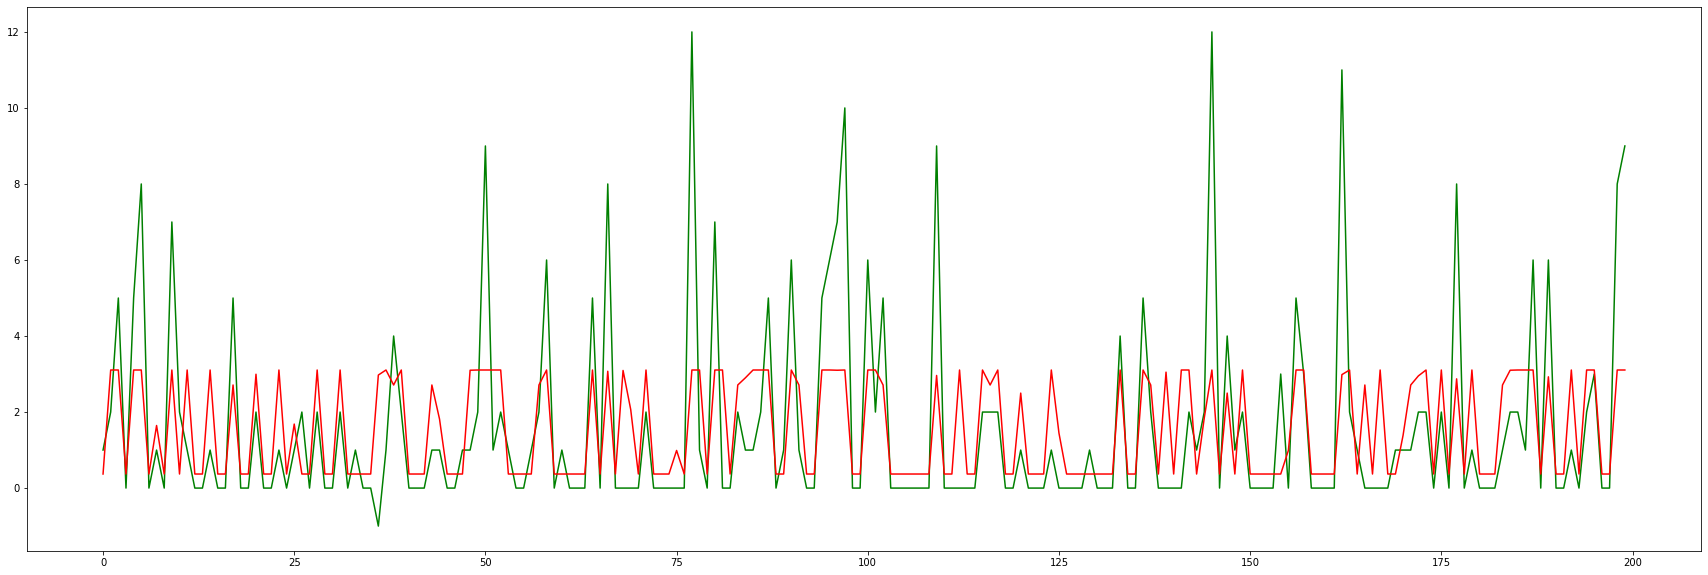

In [27]:

from matplotlib import pyplot as plt
#x=list(range(len(train_Y_t)))
plt.rcParams["figure.figsize"] = (30,10)
st=0
num=200
x=list(range(st,num))
plt.plot(x,y_test[st:num],color="green")
plt.plot(x,predict[st:num],color="red")
plt.show()

